# Digit Recognizer
### Learn computer vision fundamentals with the famous MNIST data



In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score

2023-11-12 03:02:03.992387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_train = pd.read_csv('train.csv')
x_train = data_train.drop(['label'], axis=1)
y_train = data_train['label']

print(x_train.shape)
print(y_train.shape)

x_train_norm = x_train / 255.0 # normalize the data
print(x_train_norm.iloc[0:10, 220:240])
# y_train_0 = (y_train == 0) # -> binary classification, if sample is '0' or not

(42000, 784)
(42000,)
   pixel220  pixel221  pixel222  pixel223  pixel224  pixel225  pixel226  \
0  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
1  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
2  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
3  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
4  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
5  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
6  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
7  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   
8  0.023529       0.0       0.0       0.0       0.0       0.0       0.0   
9  0.000000       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel227  pixel228  pixel229  pixel230  pixel231  pixel232  pixel233  \
0       0.0       0.0       0.0  0.000000  0.000000  0.000000  0.000000   
1 

In [3]:
x_test = pd.read_csv('test.csv')  
x_test = x_test / 255.0

## Linear classifiers (SVM, logistic regression, etc.) with SGD training.

'SGDClassifier' in scikit-learn is a class that implements the SGD (Stochastic Gradient Descent) algorithm for classification problems. It is a linear classifier, meaning that it looks for a hyperplane dividing the feature space to separate different classes.

SGD is an optimisation algorithm used to minimise the cost function, and in the context of SGDClassifier, the cost function is related to a linear model. The algorithm updates the model weights stochastically, i.e. one learning example at a time, which is beneficial for large datasets.


In [4]:
sgd = SGDClassifier(random_state=42)

sgd.fit(x_train_norm, y_train)

y_train_pred = sgd.predict(x_train_norm)
accuracy_train_sgd = accuracy_score(y_train, y_train_pred)
print(accuracy_train_sgd)

0.9261666666666667


In [5]:
y_test_kaggle = sgd.predict(x_test)
y_test_kaggle

array([2, 0, 9, ..., 3, 9, 2])

To help with visualizing data I plot it.

[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 6]


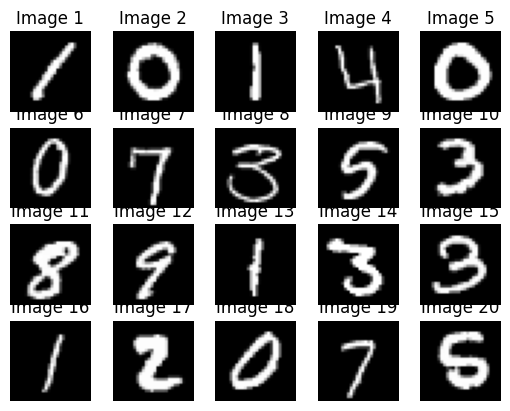

In [6]:
x = 20
for i in range(x):
    image = np.array(x_train.iloc[i]).reshape(28, 28)

    plt.subplot(4, int(x / 4), i + 1)  # 2 rows, 5 columns
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.title(f"Image {i + 1}")

first_20_predictions = sgd.predict(x_train_norm.iloc[0:20,])
print(first_20_predictions)
plt.show()

The accuracy of SGDClassifier is quite low - only 92%. Let me try different methods

## SVC - C-Support Vector Classification.

In [ ]:
parameters = {
    'C': [1, 5, 10, 50],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Only for poly kernel
    'gamma': ['scale', 'auto'],  # For 'rbf' and 'poly' kernels
}

svc_clf = SVC(random_state=42)

grid_svc_clf = GridSearchCV(svc_clf, parameters, cv=3, verbose=2, scoring='f1_macro')

grid_svc_clf.fit(x_train_norm, y_train)

print(f"Best parameters: {grid_svc_clf.best_params_}")

best_svc_clf = grid_svc_clf.best_estimator_

y_train_predict_svc = best_svc_clf.predict(x_train_norm)

accuracy_train_svc_clf = accuracy_score(y_train, y_train_predict_svc)
print(accuracy_train_svc_clf)

In [8]:
# polynomial_svm_clf = Pipeline([
#     ("poly_features", PolynomialFeatures(degree=3,include_bias=False)),
#     ("scaler", StandardScaler()),
#     ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=50))])
polynomial_svm_clf = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=50))])
polynomial_svm_clf.fit(x_train_norm, y_train)

y_train_predict_pol_svm = polynomial_svm_clf.predict(x_train_norm)

accuracy_train_svc_pol_clf = accuracy_score(y_train, y_train_predict_pol_svm)
print(accuracy_train_svc_pol_clf)

1.0


Saving SVC and Polynomial SVC classifier results

In [9]:
# SVC
results_svc = best_svc_clf.predict(x_test)
results_svc_df = pd.DataFrame({'Label': results_svc})
results_svc_df['ImageId'] = results_svc_df.index + 1
results_svc_df = results_svc_df[['ImageId', 'Label']]
results_svc_df.to_csv('results_svc_classifier.csv', index=False)

# Polynomial SVC
results_pol_svc = polynomial_svm_clf.predict(x_test)
results_pol_svc_df = pd.DataFrame({'Label': results_pol_svc})
results_pol_svc_df['ImageId'] = results_pol_svc_df.index + 1
results_pol_svc_df = results_pol_svc_df[['ImageId', 'Label']]
results_pol_svc_df.to_csv('results_pol_svc_classifier.csv', index=False)


Trying with MLP-classifier:
- splitting labeled data into train and validation set
- creating one-hot-encoding
- adding layers, compiling the model and fitting it with the data

In [10]:
x_train_2, x_valid, y_train_2, y_valid = train_test_split(x_train_norm, y_train, test_size=0.2, random_state=42)

y_train_2 = to_categorical(y_train_2, num_classes=10) 
y_valid = to_categorical(y_valid, num_classes=10)

mlp_clf = keras.models.Sequential()

mlp_clf.add(tf.keras.Input(shape=(784,)))
mlp_clf.add(keras.layers.Dense(256, activation="relu"))
mlp_clf.add(keras.layers.Dense(128, activation="relu"))
mlp_clf.add(keras.layers.Dense(128, activation="relu"))
mlp_clf.add(keras.layers.Dense(128, activation="relu"))
mlp_clf.add(keras.layers.Dense(128, activation="relu"))
mlp_clf.add(keras.layers.Dense(32, activation="relu"))
mlp_clf.add(keras.layers.Dense(10, activation="softmax"))

mlp_clf.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

print(mlp_clf.summary())

history = mlp_clf.fit(x_train_2, y_train_2, epochs=30, validation_data=(x_valid, y_valid), batch_size=10)
            
history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                3

Saving mlp classfier results:

In [11]:
results_mlp = mlp_clf.predict(x_test)

result_mlp_df = pd.DataFrame({'Label': results_mlp.argmax(axis=1)})

result_mlp_df['ImageId'] = result_mlp_df.index + 1

result_mlp_df = result_mlp_df[['ImageId', 'Label']]

result_mlp_df.to_csv('results_mlp_classifier.csv', index=False)


875/875 [==============================] - 1s 734us/step


Visualize the data:

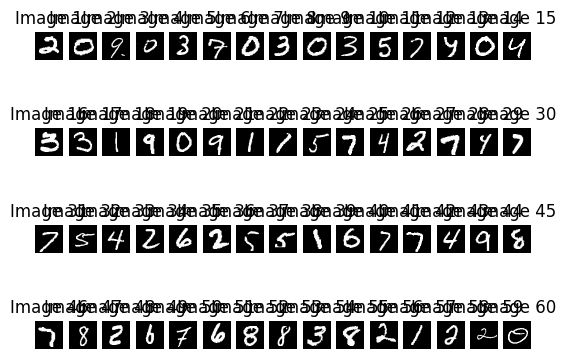

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [12]:
x = 60
for i in range(x):
    image = np.array(x_test.iloc[i]).reshape(28, 28)

    plt.subplot(4, int(x / 4), i + 1)  # 2 rows, 5 columns
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.title(f"Image {i + 1}")

plt.show() 

result_mlp_df.head(20)